In [246]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import linear_model
from django.db import migrations, models

In [117]:

os.chdir(r"C:\Users\kiranpal\Downloads\jupiter")
df=pd.read_excel("2505201915RegressionBook1.xlsx")
df

Sales  Mark_Exp  Hr_Cost
0    100        10       20
1    110        11       22
2    120        15       21
3    130        14       22
4    140        17       23
5    150        18       24
6    160        19       20
7    170        19       23

In [143]:
reg=linear_model.LinearRegression()
reg.fit(df[['Mark_Exp']],df['Sales'])
reg.score(df[['Mark_Exp']],df['Sales'])

0.9166839952866153

In [119]:
df['pre_sales']=reg.predict(df[['Mark_Exp']])
df

Sales  Mark_Exp  Hr_Cost   pre_sales
0    100        10       20   99.010189
1    110        11       22  105.705968
2    120        15       21  132.489083
3    130        14       22  125.793304
4    140        17       23  145.880640
5    150        18       24  152.576419
6    160        19       20  159.272198
7    170        19       23  159.272198

In [120]:
reg.predict([[24]])

array([192.7510917])

14 : [125.79330422]
9 : [92.31441048]
2 : [45.44395924]
12 : [112.40174672]
0 : [32.05240175]
16 : [139.18486172]
8 : [85.61863173]
12 : [112.40174672]
3 : [52.13973799]
18 : [152.57641921]


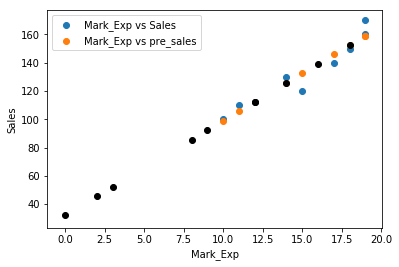

In [121]:
plt.scatter(df['Mark_Exp'],df['Sales'],label='Mark_Exp vs Sales')
plt.scatter(df['Mark_Exp'],df['pre_sales'],label='Mark_Exp vs pre_sales')
for i in range(10):
    x=np.random.randint(20)
    y=reg.coef_*x+reg.intercept_
    print(x,':',y)    
    plt.scatter(x,y,color='black')

plt.xlabel('Mark_Exp')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [122]:
reg.intercept_

32.05240174672491

In [123]:
reg.coef_

array([6.69577875])

In [124]:
df[['Sales','Mark_Exp','Hr_Cost']].corr()

Sales  Mark_Exp   Hr_Cost
Sales     1.000000  0.957436  0.420084
Mark_Exp  0.957436  1.000000  0.402204
Hr_Cost   0.420084  0.402204  1.000000

In [125]:
df=df[['Sales','Mark_Exp','Hr_Cost']]
df


Sales  Mark_Exp  Hr_Cost
0    100        10       20
1    110        11       22
2    120        15       21
3    130        14       22
4    140        17       23
5    150        18       24
6    160        19       20
7    170        19       23

In [126]:

reg=linear_model.LinearRegression()
reg.fit(df[['Mark_Exp','Hr_Cost']],df['Sales'])
reg.score(df[['Mark_Exp','Hr_Cost']],df['Sales'])  # how to find corr() here

0.9181453809634993

In [127]:
df['pre_sales']=reg.predict(df[['Mark_Exp','Hr_Cost']])
df

Sales  Mark_Exp  Hr_Cost   pre_sales
0    100        10       20   98.325940
1    110        11       22  106.307495
2    120        15       21  131.919216
3    130        14       22  126.042494
4    140        17       23  146.479103
5    150        18       24  153.759047
6    160        19       20  157.530936
7    170        19       23  159.635769

In [146]:
df.info

<bound method DataFrame.info of    Sales  Mark_Exp  Hr_Cost   pre_sales    diffSvP
0    100        10       20   98.325940   1.674060
1    110        11       22  106.307495   3.692505
2    120        15       21  131.919216 -11.919216
3    130        14       22  126.042494   3.957506
4    140        17       23  146.479103  -6.479103
5    150        18       24  153.759047  -3.759047
6    160        19       20  157.530936   2.469064
7    170        19       23  159.635769  10.364231>

In [128]:
df['diffSvP']=df['Sales']-df['pre_sales']
df

Sales  Mark_Exp  Hr_Cost   pre_sales    diffSvP
0    100        10       20   98.325940   1.674060
1    110        11       22  106.307495   3.692505
2    120        15       21  131.919216 -11.919216
3    130        14       22  126.042494   3.957506
4    140        17       23  146.479103  -6.479103
5    150        18       24  153.759047  -3.759047
6    160        19       20  157.530936   2.469064
7    170        19       23  159.635769  10.364231

In [129]:
reg.coef_

array([6.57833294, 0.70161102])

In [130]:
reg.intercept_

18.51038991361203

In [131]:
def pre(x1,x2):
    return x1*6.57833294+x2*0.70161102+18.51038991361203


In [132]:
pre(10,20)

98.32593971361203

In [133]:
df.corr()

Sales      Mark_Exp       Hr_Cost     pre_sales       diffSvP
Sales      1.000000  9.574362e-01  4.200840e-01  9.581990e-01  2.861025e-01
Mark_Exp   0.957436  1.000000e+00  4.022036e-01  9.992038e-01  1.364660e-15
Hr_Cost    0.420084  4.022036e-01  1.000000e+00  4.384100e-01  1.912697e-15
pre_sales  0.958199  9.992038e-01  4.384100e-01  1.000000e+00  1.653859e-15
diffSvP    0.286102  1.364660e-15  1.912697e-15  1.653859e-15  1.000000e+00

In [142]:
import statsmodels.formula.api as ms
import warnings
warnings.simplefilter(action='ignore')
md=ms.ols(formula='Sales~Mark_Exp+Hr_Cost', data=df)
reg=md.fit()
print(reg.summary())
print(reg.params)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     28.04
Date:                Mon, 01 Jul 2019   Prob (F-statistic):            0.00192
Time:                        17:06:51   Log-Likelihood:                -26.394
No. Observations:                   8   AIC:                             58.79
Df Residuals:                       5   BIC:                             59.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5104     47.458      0.390      0.7

In [136]:
df[['Sales','Mark_Exp']].corr()

Sales  Mark_Exp
Sales     1.000000  0.957436
Mark_Exp  0.957436  1.000000

In [60]:
import warnings 
warnings.simplefilter(action='once',category=FutureWarning)
import pandas as pd
import numpy as np
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model as m
from sklearn import metrics
import matplotlib.pyplot as plt

In [97]:
df=pd.read_csv('Adv.csv',index_col=0)
df.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [62]:
df.index


Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
           dtype='int64', length=200)

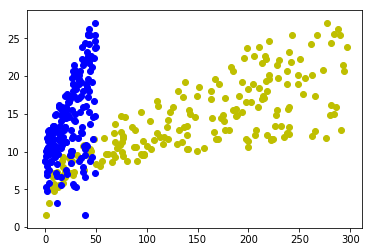

In [98]:
plt.scatter(df['TV'],df['Sales'],color='y')
plt.scatter(df['Radio'],df['Sales'],color='b')
plt.show()

In [99]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [100]:

x=df.corr()
x.iloc[0:5,0:1]

TV
TV         1.000000
Radio      0.054809
Newspaper  0.056648
Sales      0.782224

In [101]:
x=df[['TV','Radio']]
y=df['Sales']
print(x.head(3))
print(y.head(3))

      TV  Radio
1  230.1   37.8
2   44.5   39.3
3   17.2   45.9
1    22.1
2    10.4
3     9.3
Name: Sales, dtype: float64


In [66]:
df.corr()


TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

In [102]:
lr=m.LinearRegression().fit(x,y)
y_predict=df['pre_sale']=lr.predict(x)
print('R-squared is:',metrics.r2_score(y,y_predict))
df.head(10)

R-squared is: 0.8971942610828956


TV  Radio  Newspaper  Sales   pre_sale
1   230.1   37.8       69.2   22.1  20.555465
2    44.5   39.3       45.1   10.4  12.345362
3    17.2   45.9       69.3    9.3  12.337018
4   151.5   41.3       58.5   18.5  17.617116
5   180.8   10.8       58.4   12.9  13.223908
6     8.7   48.9       75.0    7.2  12.512084
7    57.5   32.8       23.5   11.8  11.718212
8   120.2   19.6       11.6   13.2  12.105516
9     8.6    2.1        1.0    4.8   3.709379
10  199.8    2.6       21.2   10.6  12.551697

In [72]:
print('coefiecent is:',lr.coef_)
print('intercept of equation:',lr.intercept_)

coefiecent is: [0.04575482 0.18799423]
intercept of equation: 2.921099912405138


In [84]:
df[['TV','Radio','Sales']].corr()

TV     Radio     Sales
TV     1.000000  0.054809  0.782224
Radio  0.054809  1.000000  0.576223
Sales  0.782224  0.576223  1.000000

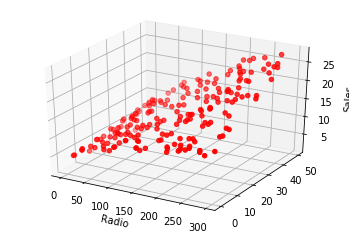

In [113]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
#plt.draw()
ax.scatter(df['TV'],df['Radio'],df['Sales'],c='r',marker='o')
#plt.draw()
xx1,xx2=np.meshgrid(np.linspace(df['TV'].min(),df['TV'].max(),num=10),
                   np.linspace(df['Radio'].min(),df['Radio'].max(),num=10))
xx=np.column_stack([xx1.ravel(),xx2.ravel()])
yy=lr.predict(xx)




ax.plot_surface(xx1,xx2,yy.reshape(xx1.shape),color='None')
#plt.draw()
ax.set_xlabel('TV')
ax.set_xlabel('Radio')
ax.set_zlabel('Sales')
#plt.draw()
plt.show()


In [149]:
df=pd.read_csv('nba.csv')
df.head()

Name            Team  Number Position   Age Height  Weight  \
0  Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1    Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
2   John Holland  Boston Celtics    30.0       SG  27.0    6-5   205.0   
3    R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
4  Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0

In [150]:
df.corr()

Number       Age    Weight    Salary
Number  1.000000  0.028724  0.206921 -0.112386
Age     0.028724  1.000000  0.087183  0.213459
Weight  0.206921  0.087183  1.000000  0.138321
Salary -0.112386  0.213459  0.138321  1.000000

In [198]:
df=pd.read_csv('titanic_train.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

In [226]:
x=df.corr()

In [227]:
x.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [232]:
x=x.columns.tolist()

In [234]:
df[x].head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [236]:
x1=df.columns.tolist()
df[x1].head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [220]:
x=set(x)
x

{'Age', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'SibSp', 'Survived'}

In [238]:
x1=set(x1)
x1

{'Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket'}

In [242]:
x1=list(x1.difference(x))

In [244]:
df[x1].head()

Cabin     Sex                                               Name  \
0   NaN    male                            Braund, Mr. Owen Harris   
1   C85  female  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2   NaN  female                             Heikkinen, Miss. Laina   
3  C123  female       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4   NaN    male                           Allen, Mr. William Henry   

             Ticket Embarked  
0         A/5 21171        S  
1          PC 17599        C  
2  STON/O2. 3101282        S  
3            113803        S  
4            373450        S

In [247]:
df[x].head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500